# How are in-demand skills trending for Data Analysts

In [ ]:
w

In [83]:
df_us = df[(df['job_country']=='United States') &(df['job_title_short']=='Data Analyst')].copy()

In [84]:
df_us['month'] = df_us['job_posted_date'].dt.month

In [85]:
df_us_explode = df_us.explode('job_skills')

In [86]:
df_uspivot = df_us_explode.pivot_table(index='month', columns='job_skills', aggfunc='size', fill_value=0)

df_uspivot.loc['total'] = df_uspivot.sum()

df_uspivot = df_uspivot[df_uspivot.loc['total'].sort_values(ascending=False).index]

df_uspivot = df_uspivot.drop('total')

df_uspivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df_us_jobs_count = df_us.groupby('month').size()

In [88]:
df_da_us_perc = df_uspivot.div(df_us_jobs_count/100, axis=0)

In [89]:
df_da_us_perc.reset_index(inplace=True)

In [90]:
df_da_us_perc['job_posted_month'] = df_da_us_perc['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_us_perc.set_index('job_posted_month', inplace= True)
df_da_us_perc.drop(columns='month', inplace=True)


In [91]:
df_plot = df_da_us_perc.iloc[:, :5]
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


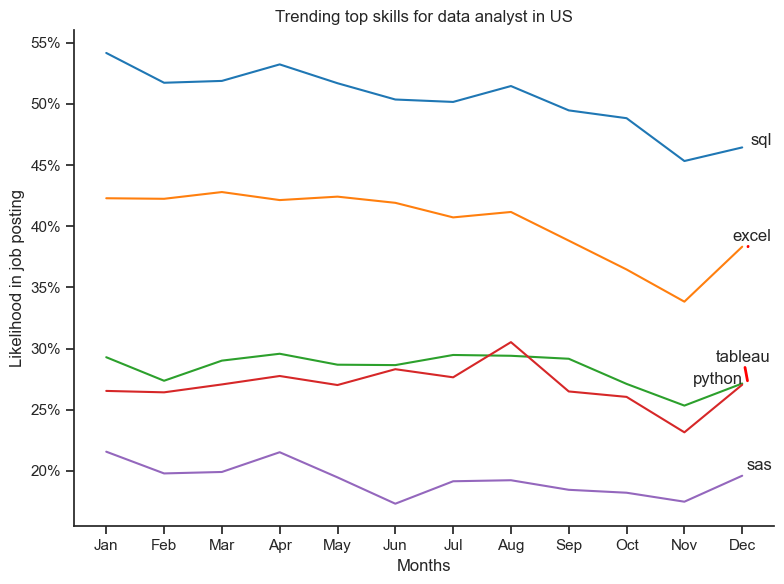

In [ ]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text

plt.figure(figsize=(8, 6))

sns.lineplot(df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
plt.title('Trending top skills for data analyst in US')
plt.xlabel("Months")
plt.ylabel('Likelihood in job posting')
plt.legend().remove()

texts = []
for i in range(5):
    texts.append(plt.text(11.1,df_plot.iloc[-1, i], df_plot.columns[i]))

adjust_text(texts=texts, arrowprops=dict(arrowstyle='-', color='red', lw=2))

sns.despine()
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()

# Idk how to deal with the overlapping of the lines at the end ill update it if i find a way